In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
df = pd.read_csv('NoShow.csv')

In [78]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicape,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [79]:
df.shape

(110527, 12)

In [80]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicape         0
SMS_received      0
No-show           0
dtype: int64

In [81]:
# checking the data types
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicape          int64
SMS_received       int64
No-show           object
dtype: object

In [82]:
# converting ScheduledDay and AppointmentDay from string to datetime objects
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicape                       int64
SMS_received                    int64
No-show                        object
dtype: object

In [83]:
# check for duplicated values
df.duplicated().sum()

635

In [84]:
# remove any duplicates found
df.drop_duplicates(inplace=True)

In [85]:
# now we check again
df.duplicated().sum()

0

In [86]:
# now we check the describtive analysis for the data
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicape,SMS_received
count,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000
mean,37.089506,0.098287,0.197248,0.071825,0.030430,0.022131,0.322881
std,23.121196,0.297704,0.397923,0.258199,0.171768,0.160878,0.467580
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [87]:
df[df["Age"] < 0].shape[0]

1

In [88]:
df.drop(df[df["Age"] < 0].index, inplace=True)

In [89]:
# we check again
df[df["Age"] < 0].shape[0]

0

In [90]:
# Check if the Scheduled Day is unique or not ?
df.ScheduledDay.nunique()

103548

In [91]:
#Extracing Year, Month, Week, Day, and Hour from ScheduledDay
df["ScheduledDay_year"] = df.ScheduledDay.dt.year
df['ScheduledDay_month']= df.ScheduledDay.dt.month
df['ScheduledDay_week']= df.ScheduledDay.dt.week
df['ScheduledDay_day']= df.ScheduledDay.dt.day
df['ScheduledDay_hour']= df.ScheduledDay.dt.hour

In [92]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicape,SMS_received,No-show,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,17,29,18
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,17,29,16
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,17,29,16
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,17,29,17
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,17,29,16


In [93]:
df.AppointmentDay.nunique()

27

In [94]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicape,SMS_received,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour
count,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000
mean,37.089853,0.098288,0.197250,0.071826,0.030430,0.022131,0.322884,2015.999436,4.825200,18.750198,14.249939,10.772975
std,23.121015,0.297705,0.397924,0.258200,0.171769,0.160879,0.467581,0.023746,0.715768,2.803226,9.348329,3.217516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,17.000000,6.000000,8.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,19.000000,13.000000,10.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,5.000000,20.000000,22.000000,13.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2016.000000,12.000000,51.000000,31.000000,21.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 17 columns):
Gender                109891 non-null object
ScheduledDay          109891 non-null datetime64[ns, UTC]
AppointmentDay        109891 non-null datetime64[ns, UTC]
Age                   109891 non-null int64
Neighbourhood         109891 non-null object
Scholarship           109891 non-null int64
Hypertension          109891 non-null int64
Diabetes              109891 non-null int64
Alcoholism            109891 non-null int64
Handicape             109891 non-null int64
SMS_received          109891 non-null int64
No-show               109891 non-null object
ScheduledDay_year     109891 non-null int64
ScheduledDay_month    109891 non-null int64
ScheduledDay_week     109891 non-null int64
ScheduledDay_day      109891 non-null int64
ScheduledDay_hour     109891 non-null int64
dtypes: datetime64[ns, UTC](2), int64(12), object(3)
memory usage: 15.1+ MB


In [96]:
df.ScheduledDay_year.nunique()

2

In [97]:
df.ScheduledDay_year.value_counts()

2016    109829
2015        62
Name: ScheduledDay_year, dtype: int64

In [98]:
df.ScheduledDay_month.describe()

count    109891.000000
mean          4.825200
std           0.715768
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max          12.000000
Name: ScheduledDay_month, dtype: float64

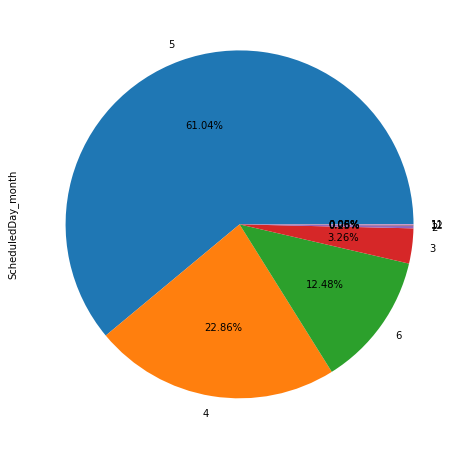

In [99]:
# this pie chart with the percentage to show the data of months
df.ScheduledDay_month.value_counts().plot(kind= 'pie', autopct='%.2f%%', figsize=(8,8));

In [100]:
df.ScheduledDay_day.describe()

count    109891.000000
mean         14.249939
std           9.348329
min           1.000000
25%           6.000000
50%          13.000000
75%          22.000000
max          31.000000
Name: ScheduledDay_day, dtype: float64

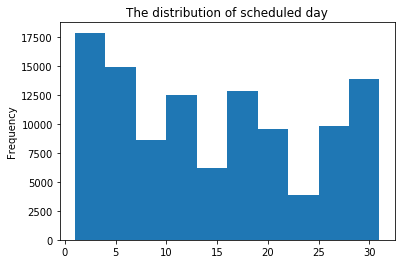

In [101]:
df.ScheduledDay_day.plot(kind='hist',title= 'The distribution of scheduled day');

In [102]:
df.ScheduledDay_hour.describe()

count    109891.000000
mean         10.772975
std           3.217516
min           6.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          21.000000
Name: ScheduledDay_hour, dtype: float64

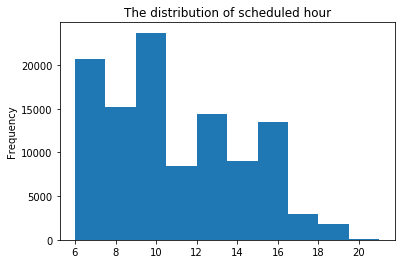

In [103]:
df.ScheduledDay_hour.plot(kind='hist',title= 'The distribution of scheduled hour');

In [104]:
def disply_distribution(df, col_name, title):
    df[col_name].value_counts().plot(kind='bar', title=title)

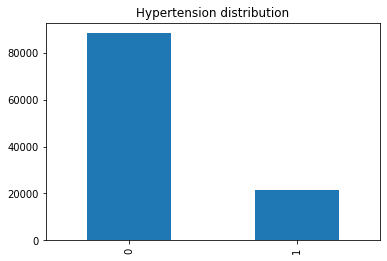

In [105]:
disply_distribution(df, 'Hypertension', 'Hypertension distribution')

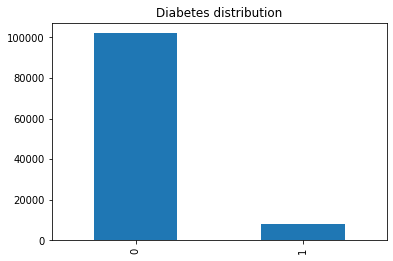

In [106]:
disply_distribution(df, 'Diabetes', 'Diabetes distribution')

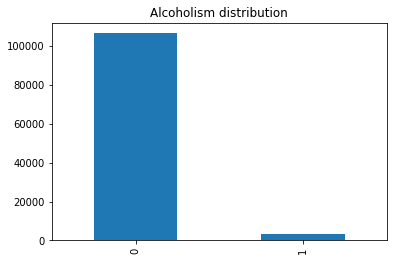

In [107]:
disply_distribution(df, 'Alcoholism', 'Alcoholism distribution')

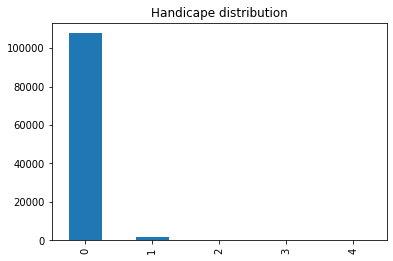

In [108]:
disply_distribution(df, 'Handicape', 'Handicape distribution')

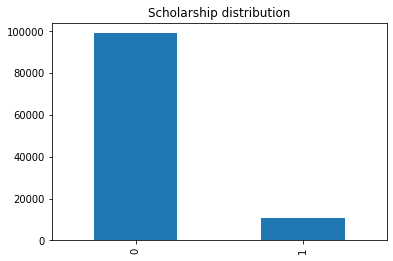

In [109]:
disply_distribution(df, 'Scholarship', 'Scholarship distribution')

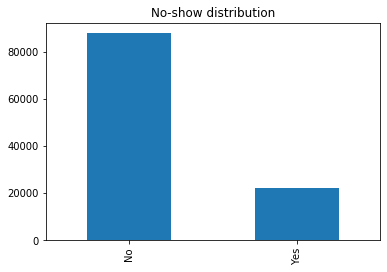

In [110]:
disply_distribution(df, 'No-show', 'No-show distribution')

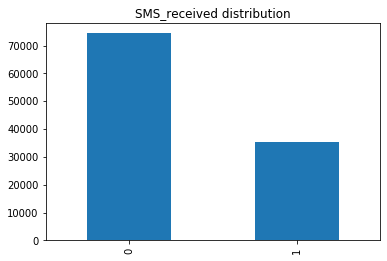

In [111]:
disply_distribution(df, 'SMS_received', 'SMS_received distribution')

In [112]:
def countplot_distro(figsize, x, title):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.countplot(x=x, data=df, hue='No-show');

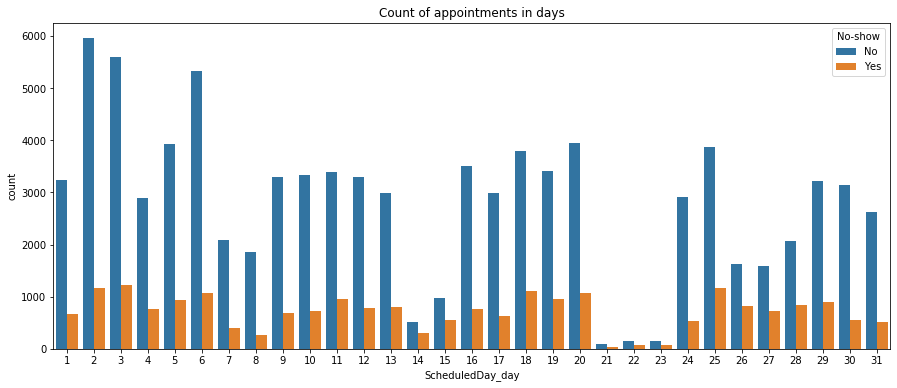

In [113]:
countplot_distro((15,6), df['ScheduledDay_day'], 'Count of appointments in days')

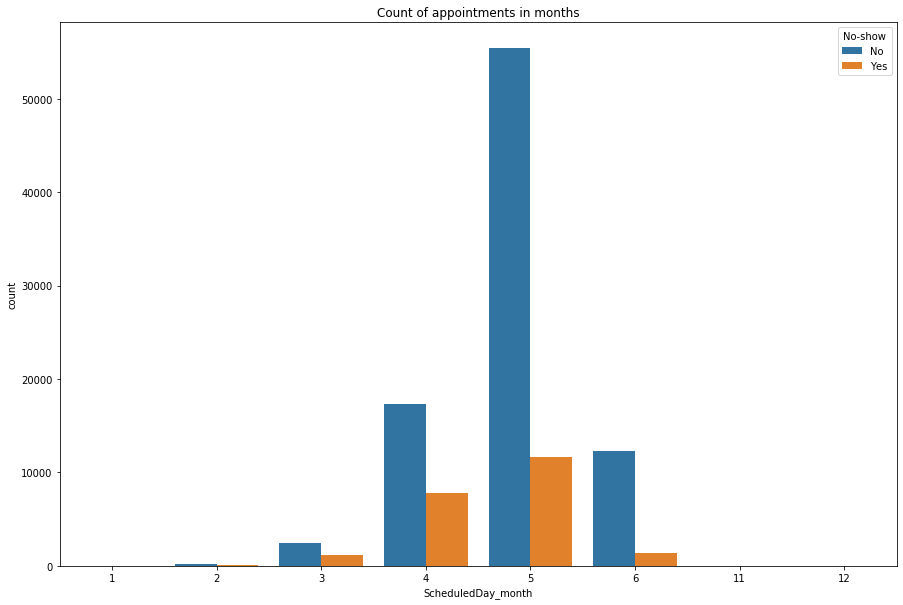

In [114]:
countplot_distro((15,10), df['ScheduledDay_month'], 'Count of appointments in months')

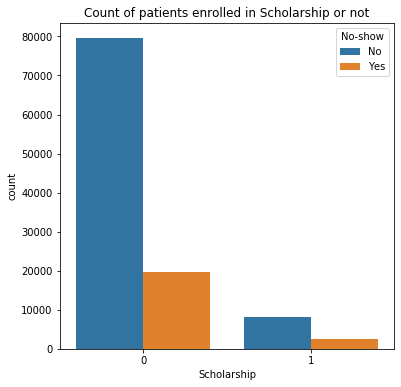

In [115]:
countplot_distro((6,6), df['Scholarship'], 'Count of patients enrolled in Scholarship or not')

This show us that a lot of people that are not enrolled in the Brazil schoolarship has appointments and does show up for appointments

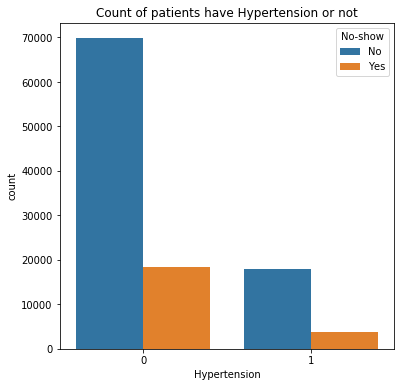

In [116]:
countplot_distro((6,6), df['Hypertension'], 'Count of patients have Hypertension or not')

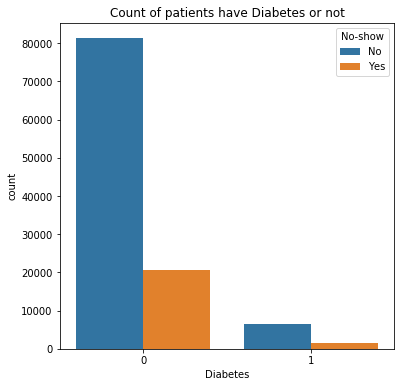

In [117]:
countplot_distro((6,6), df['Diabetes'], 'Count of patients have Diabetes or not')

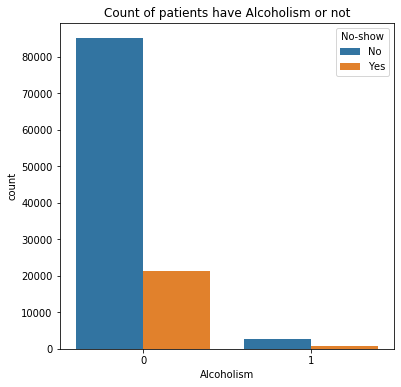

In [118]:
countplot_distro((6,6), df['Alcoholism'], 'Count of patients have Alcoholism or not')

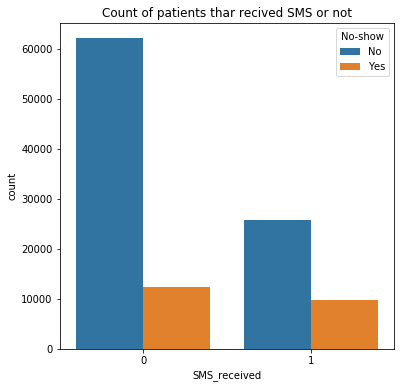

In [119]:
countplot_distro((6,6), df['SMS_received'], 'Count of patients thar recived SMS or not')

As you can see, sending SMS doesn't affect to increase patients show up

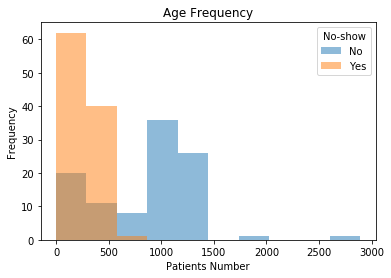

In [120]:
pd.crosstab(df['Age'],df['No-show']).plot(kind='hist',alpha=0.5);
plt.title('Age Frequency');
plt.xlabel('Patients Number');

In [121]:
# so the high frequency age that show up for appointments is 38
df[df['No-show'] == 'No']['Age'].median()

38.0

In [124]:
country_order = df['Neighbourhood'].value_counts().index

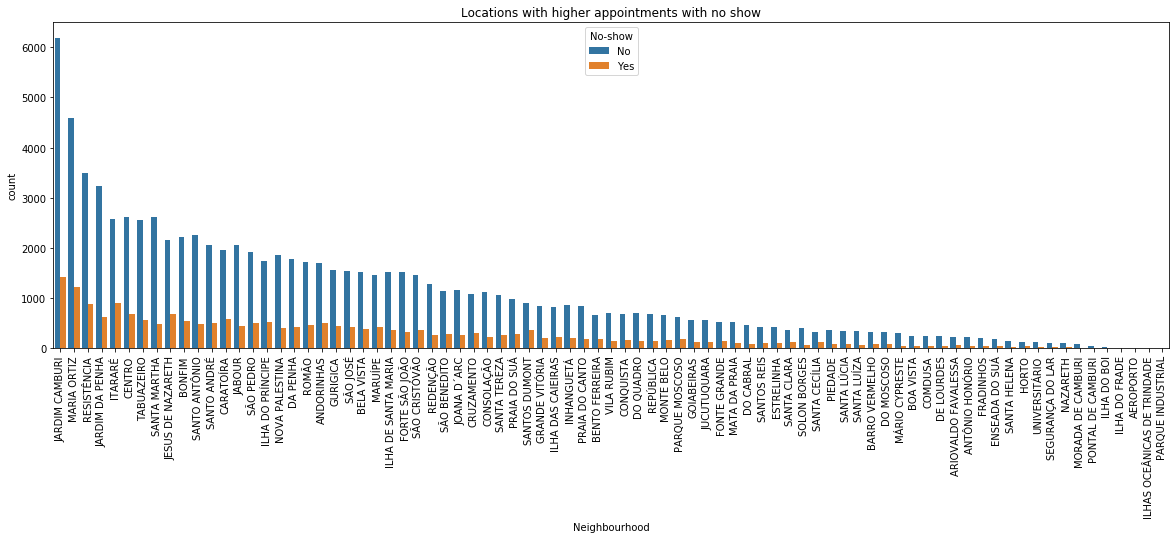

In [123]:
plt.figure(figsize=(20,6))
plt.title('Locations with higher appointments with no show')
plt.xticks(rotation=90)
sns.countplot(x=df['Neighbourhood'], data=df, hue='No-show', order=country_order);